---
# Lecture notes - Overfitting and underfitting
---

This is the lecture note for **overfitting and underfitting**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to overfitting and underfitting. I encourage you to read further about overfitting and underfitting. </p>

Read more:

- [Overfitting wikipedia](https://en.wikipedia.org/wiki/Overfitting)
- [Underfitting vs overfitting sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
- [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)
- [PolynomialFeatures sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [6.3.7 Generating polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)
- [Bias-variance tradeoff towards datascience](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [Bias-variance tradeoff wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
---

In [90]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('Solarize_Light2')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Simulate data

Simulate from a 2nd order polynomial wiyh Gaussian noise 

$$y = a_0 + a_1x + a_2x^2 + \epsilon ,$$ 
where $\epsilon \sim \mathcal{N(0,1)}$

<Axes: title={'center': '$y = x^2 + .5x + 3 + \\epsilon$'}, xlabel='x', ylabel='y'>

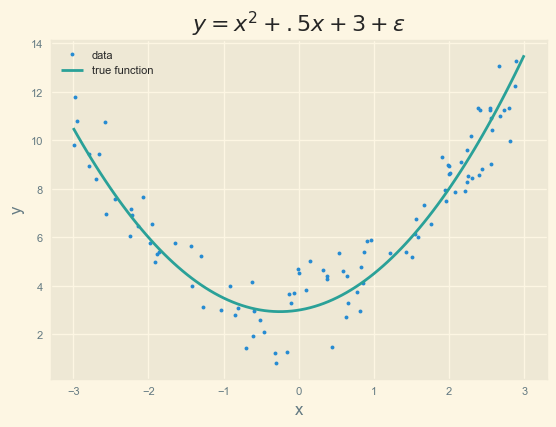

In [91]:
sample = 100 # number of samples
X = np.random.uniform(-3, 3, (sample, 1)) # sample from uniform distribution
'''Generate a sample of 100 points from a uniform distribution between -3 and 3 and 1 dimension.'''
f = lambda x: x**2 + .5*x + 3 # function to approximate
# lambda is a way to define a function in one line without having to use def takes x as input and returns x^2 + .5x + 3 as output
# x is a vector of inputs and f(x) is a vector of outputs
y = f(X) + np.random.randn(sample, 1) # add noise to the function. sample is the mean and 1 is the standard deviation

# plot data
def draw_data():
    fig = plt.figure(dpi=100)
    ax = plt.axes()
    ax.plot(X, y, '.', label='data')

    x = np.linspace(-3, 3, sample)
    ax.plot(x, f(x), label='true function')

    ax.set(title='$y = x^2 + .5x + 3 + \epsilon$', xlabel='x', ylabel='y')
    ax.legend(edgecolor='r')


    return ax

draw_data()

---

## Polynomial regression

Polynomial regression fits a polynomial of order $n$ to model the relationship between independent variable $x$ and dependent variable $y$. The polynomial regression model in general:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $$

It is linear in terms of the unknown parameters $\beta_i$, and can be expressed in matrix form and solved using OLS normal equation as we did for multiple linear regression. In fact polynomial regression is a special case of multiple linear regression.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Using ```sklearn.preprocessing.PolynomialFeatures``` we can feature engineer new features that previously didn't exist. It creates a feature matrix that represent polynomial combinations. For example $X = (X_1, X_2)$ would be transformed to ($1, X_1, X_2, X_1^2, X_2^2, X_1X_2, X_2^2)$ using degree 2, if bias is included, if bias is excluded 1 disappears.

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False) # create a polynomial feature object
data = np.array([[2, 3]]) # create a 2x3 array
data_poly = poly.fit_transform(data) # transform the data to include polynomial features
data_poly[:4] # show the first 5 rows of the transformed data

array([[2., 3., 4., 6., 9.]])

In [93]:
x_poly = poly.fit_transform(X) # transform the data to include polynomial features
x_poly[:5] # show the first 5 rows of the transformed data


array([[ 0.85623588,  0.73313988],
       [ 0.09616675,  0.00924804],
       [-1.88521541,  3.55403716],
       [-0.31701101,  0.10049598],
       [ 0.63341448,  0.4012139 ]])

In [94]:
from sklearn.linear_model import LinearRegression

model  = LinearRegression() # create a linear regression model
model.fit(x_poly, y) # fit the model to the data with polynomial features and the target variable y
model.coef_, model.intercept_ # show the coefficients and intercept of the model

(array([[0.46761047, 0.96572536]]), array([3.20567782]))

## Underfitting 

Underfitting is when a model is too simple to represent the data accurately

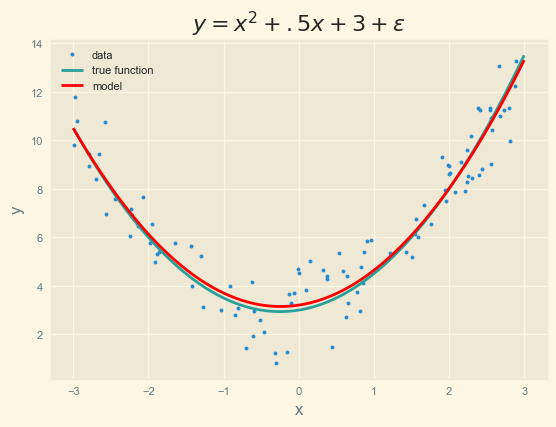

In [95]:
x = np.linspace(-3, 3, sample) # create a range of x values to plot the model. sample is the number of points
x_poly = poly.fit_transform(x.reshape(-1, 1)) # transform the data to include polynomial features
y_pred = model.predict(x_poly) # predict the target variable y for the x values

ax = draw_data()
ax.plot(x, y_pred, label='model', color='red')
ax.legend(edgecolor='red')

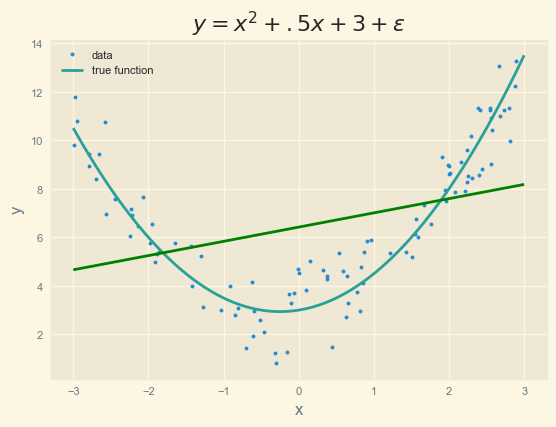

In [96]:
model = LinearRegression() # create a linear regression model
model.fit(X, y) # fit the model to the data with polynomial features and the target variable y
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1, 1)), label='Underfit model to simple data', color='green')

## Overfitting 

Model to complicated, and fitted on to much data. Complicated model(**high variance**) risk to fit to much noise into training data, which make them generalize worse. Overfitting usually accours when there is too small training set, and/or it is not representative for testing data.

(100, 30)


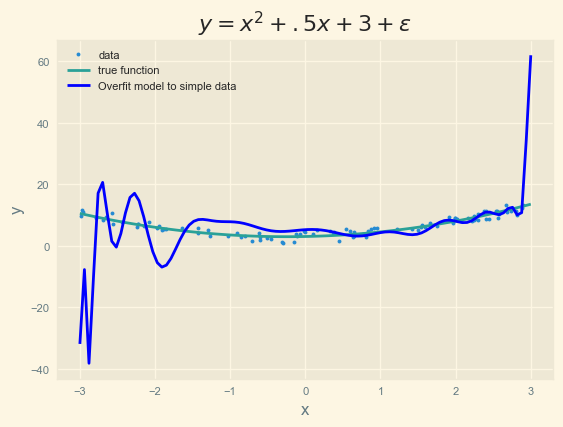

In [101]:
poly_model_30 = PolynomialFeatures(degree=30, include_bias=False) # create a polynomial feature object
x_poly_30 = poly_model_30.fit_transform(X) # transform the data to include polynomial features
print(x_poly_30.shape)

model_30 = LinearRegression() # create a linear regression model
model_30.fit(x_poly_30, y) # fit the model to the data with polynomial features and the target variable y

x = np.linspace(-3, 3, sample) # create a range of x values to plot the model. sample is the number of points

x_poly = poly_model_30.fit_transform(x.reshape(-1, 1)) # transform the data to include polynomial features. reshape is used to transform the data to a 2D array
y_pred = model_30.predict(x_poly) # predict the target variable y for the x values

ax = draw_data()
ax.plot(x, y_pred, label='Overfit model to simple data', color='blue')
ax.legend(edgecolor='red')

## Choose a model 

- Note: that we are not always able to plot the data and it's corresponding graphs as our data might be high dimensional. In order to choose correct model we can use a **cost/loss** func to keep track of the error for different models __(different degree's of polynimial)__

In [104]:
from sklearn.model_selection import train_test_split

# increase the number of samples
sample = 10000
X = np.random.uniform(-3, 3, (sample, 1)) # sample from uniform distribution with 1000 samples and 1 dimension
f = lambda x: x**2 + .5*x + 3 # function to approximate each x value
y = f(X) + np.random.randn(sample, 1) # add noise to the function. sample is the mean and 1 is the standard deviation
# we send the X values to the function f and add noise to the output

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (10000, 1), y shape: (10000, 1)


### Train | Validation | Test|Split

We split our data set into:

- training set 
- validation set 
- testing set 

__Reason__ for split is to use the __validation data__ for choosing the degree of the polynomial __(hyperparameter)__

In [105]:
# use train_split twice to split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split the data into training and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42) # split the test set into validation and test sets

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape # show the shape of the training, validation and test sets

((6700, 1), (1650, 1), (1650, 1), (6700, 1), (1650, 1), (1650, 1))

## Fit model and predict 

In [128]:
from sklearn.metrics import mean_squared_error as mse

RMSE_val = []

# create a function to calculate the RMSE for different polynomial degrees

for degree in range(1, 100):
    poly = PolynomialFeatures(degree=degree, include_bias=False) # create a polynomial feature object
    x_poly_train = poly.fit_transform(X_train) # transform the data to include polynomial features
    x_poly_val = poly.fit_transform(X_val) # transform the data to include polynomial features
    model = LinearRegression() # create a linear regression model
    model.fit(x_poly_train, y_train) # fit the model to the data with polynomial features and the target variable y
    y_pred = model.predict(x_poly_val) # predict the target variable y for the x values
    RMSE_val.append(np.sqrt(mse(y_val, y_pred))) # calculate the RMSE for the validation set

'We see that for a polynomial degree of 3, the RMSE is minimized and it does not change much after going in higher degrees\nhence we can use a polynomial degree of 3 to fit the model to the data so it generalizes well to new data\nThis plot is called a elbow plot and is used to find the optimal number of clusters in k-means clustering algorithm\nNow we could move on to train the model using degree 3 and test it on the test set to see how well it generalizes to new data'

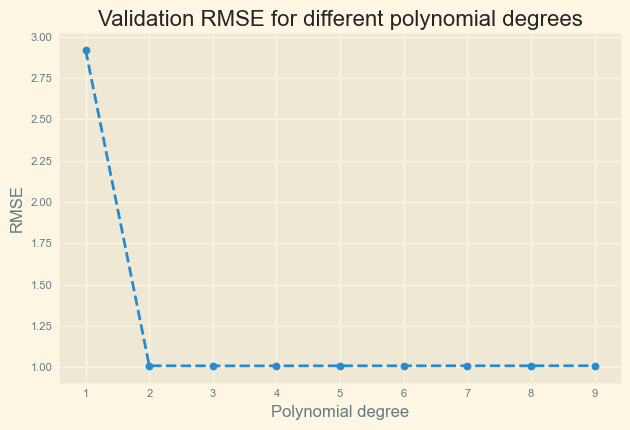

In [140]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(range(1, 10), RMSE_val[:9],'--o', label='Validation RMSE')  # plot the RMSE for the validation set rmse_val is a list of RMSE values for different polynomial degrees
ax.set(xlabel='Polynomial degree', ylabel='RMSE', title='Validation RMSE for different polynomial degrees')
plt.tight_layout()
'''We see that for a polynomial degree of 3, the RMSE is minimized and it does not change much after going in higher degrees
hence we can use a polynomial degree of 3 to fit the model to the data so it generalizes well to new data
This plot is called a elbow plot and is used to find the optimal number of clusters in k-means clustering algorithm
Now we could move on to train the model using degree 3 and test it on the test set to see how well it generalizes to new data'''


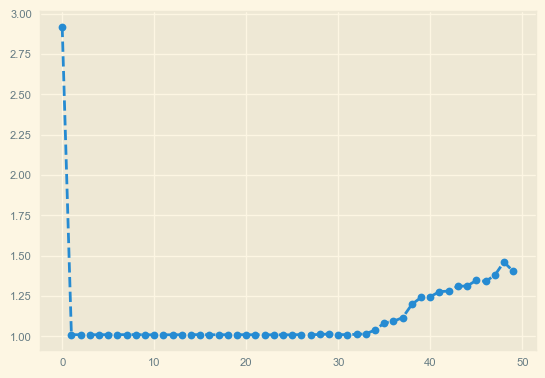

In [138]:
ax = plt.axes()
'''Try much higher degrees to see how the RMSE changes'''
'''Note that this might happen much faster for real'''
ax.plot(range(50), RMSE_val[:50],'--o', label='Validation RMSE')

## Bias-Variance Trade-off 

A model generalization error is bias + variance + irreducible erro

- __bias__- is the diff between average prediction and the correct value.
    - __high bias__, pays little attention to data
    - __oversimplifies__ and __underfits__
  
- __variance__- spreds the data 
    - many degrees of fredom -> high variance -> overfits the data

- __irrducible error__- due to noise of data, only way to __decreese this is to clean the data 
itself.

Higher model complexity -> higher variance but lower bias 

Lower model complexity -> lower variance but high bias 

The **goal** is to **choose a model** that is **complex enough** not to underfit, but not to complex to overfit. What is needed is to find a __balance__ between __bias and variance__.